In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

Data Ingestion:
In this project, Data is available in two csv file which have been imported using pandas.read_csv function and stored as df1 and df2 dataframe. Further to use data we have created a pandas data frame 'df' and vertically stacked these two data set (df1 and df2) in new dataset df. 

In [4]:
df1 = pd.read_csv('Data\coin_gecko_2022-03-16.csv')

In [5]:
df2 = pd.read_csv('Data\coin_gecko_2022-03-17.csv')

In [6]:
print(df1.shape,df2.shape)

(500, 9) (500, 9)


In [7]:
df = np.vstack([df1,df2])

In [8]:
df = pd.DataFrame(data=df, columns= df1.columns)

In [9]:
df.head(5)

,coin,symbol,price,1h,24h,7d,24h_volume,mkt_cap,date
0,Bitcoin,BTC,40859.46,0.022,0.03,0.055,35390763321.0,770991461396.0,2022-03-16
1,Ethereum,ETH,2744.41,0.024,0.034,0.065,19748695312.0,327104429349.0,2022-03-16
2,Tether,USDT,1.0,-0.001,-0.001,0.0,57934969077.0,79965155138.0,2022-03-16
3,BNB,BNB,383.43,0.018,0.028,0.004,1395853984.0,64043816800.0,2022-03-16
4,USD Coin,USDC,0.999874,-0.001,0.0,-0.0,3872273611.0,52222137400.0,2022-03-16


Data Preprocessing

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

Checking for Outlier

In [12]:
df.dtypes

coin          object
symbol        object
price         object
1h            object
24h           object
7d            object
24h_volume    object
mkt_cap       object
date          object
dtype: object

In [13]:
col = df.columns
for i in col[2:-1]:
    df[i]=df[i].astype(float)

In [14]:
df.dtypes

coin           object
symbol         object
price         float64
1h            float64
24h           float64
7d            float64
24h_volume    float64
mkt_cap       float64
date           object
dtype: object

In [15]:
def outlier (data_name):
    X=[]
    Y=[]
    Z=[]
    numeric_col = []
    non_numeric_col =[]
    Upper_limit ={}
    Lower_limit = {}
    outlier =[]
    no_outlier = []
    col = data_name.columns
    for i in col[1:]:
        if data_name[i].dtype!='O':
            numeric_col.append(str(i))
            per_25 = data_name[i].quantile(0.25)
            X.append(per_25)
            per_5 = data_name[i].quantile(0.5)
            Y.append(per_5)
            per_75 = data_name[i].quantile(0.75)
            Z.append(per_75)
            IQR = per_75 - per_25
            up_limit = per_75 + 1.5*IQR
            lo_limit = per_25 - 1.5*IQR
            Upper_limit[i]=up_limit
            Lower_limit[i]=lo_limit
            if data_name[i].max()>up_limit:
                outlier.append(i)
            elif data_name[i].min()<lo_limit:
                outlier.append(i)
            else:
                no_outlier.append(i)


        else:
            non_numeric_col.append(i)

    return outlier , no_outlier, Lower_limit, Upper_limit



In [16]:
out, no_out,  low_limit, upe_limit = outlier(df)

In [17]:
for i in (out):
    df[i] = df[i].clip(lower=low_limit[i], upper=upe_limit[i])


In [18]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64

In [19]:
df['1h'] =df['1h'].fillna(df['1h'].median())
df['24h'] =df['24h'].fillna(df['24h'].median())
df['7d'] =df['7d'].fillna(df['7d'].median())
df['24h_volume'] =df['24h_volume'].fillna(df['24h_volume'].median())


In [20]:
df.isnull().sum()

coin          0
symbol        0
price         0
1h            0
24h           0
7d            0
24h_volume    0
mkt_cap       0
date          0
dtype: int64

In [21]:
df.drop(columns=['symbol','date'],axis=1, inplace=True)

UniVariate Analysis

In [29]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap
count,1.000000e+03,1000.000000,1000.000000,1000.00000,1.000000e+03,1.000000e+03
mean,4.889560e+00,0.010145,0.019978,0.00123,2.629465e+07,4.373641e+08
std,6.821937e+00,0.013293,0.031105,0.07332,3.473580e+07,4.474247e+08
min,1.484000e-09,-0.026000,-0.050000,-0.15800,0.000000e+00,6.577043e+07
25%,1.940547e-01,0.001000,0.001000,-0.04025,1.842994e+06,1.157776e+08
50%,1.095000e+00,0.006000,0.016000,-0.00050,8.343005e+06,2.120036e+08
75%,7.232500e+00,0.019000,0.035000,0.03600,3.923430e+07,5.948436e+08
max,1.779017e+01,0.046000,0.086000,0.15400,9.744085e+07,1.313443e+09


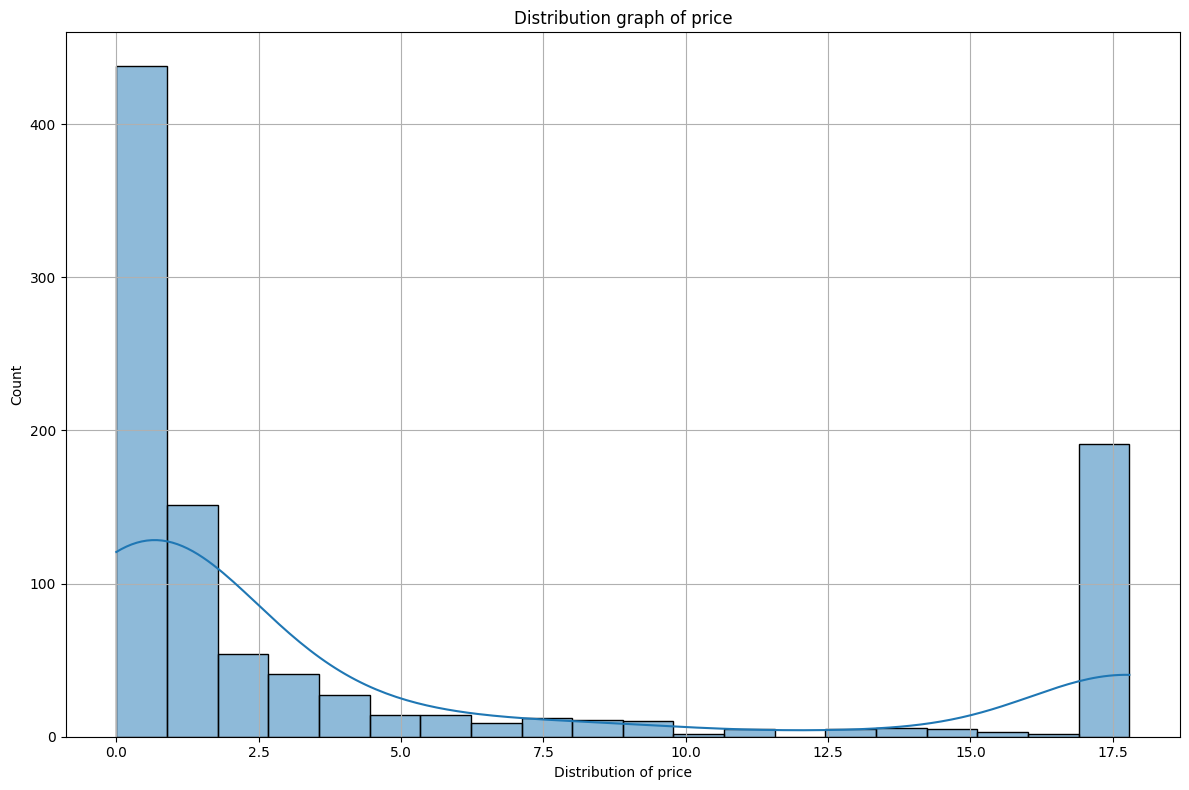

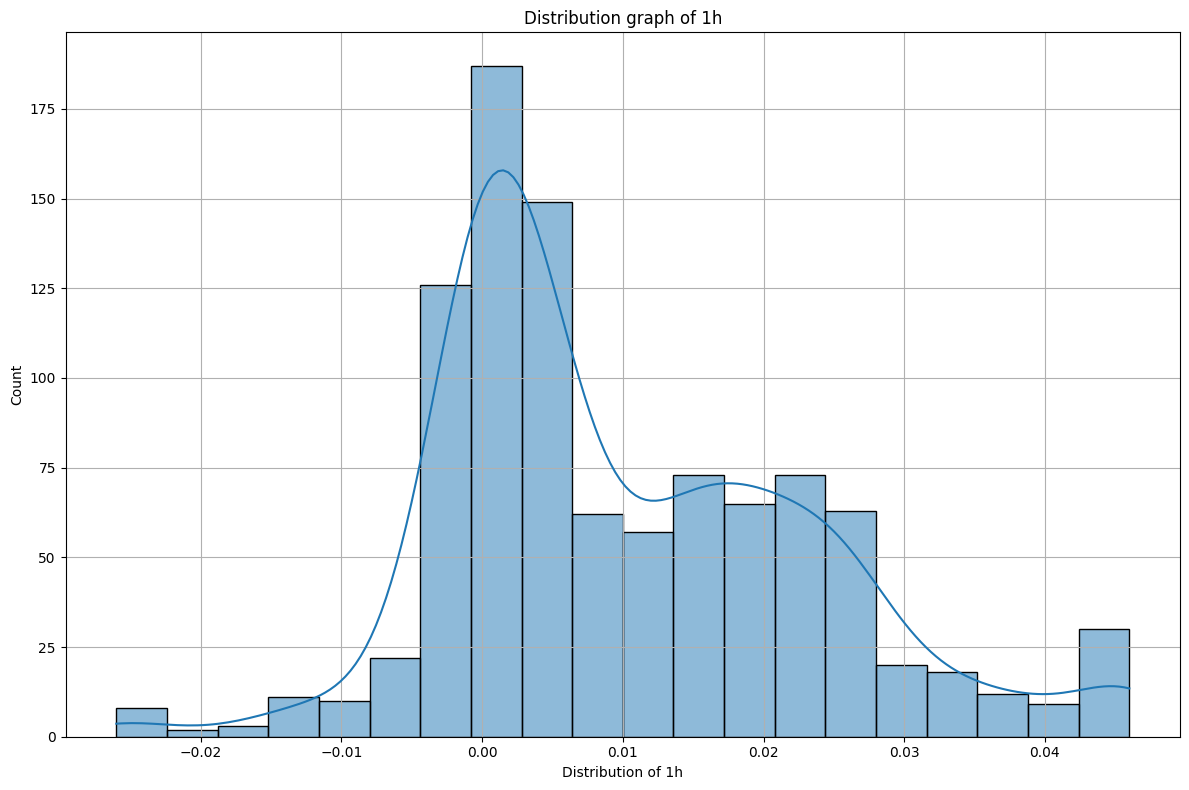

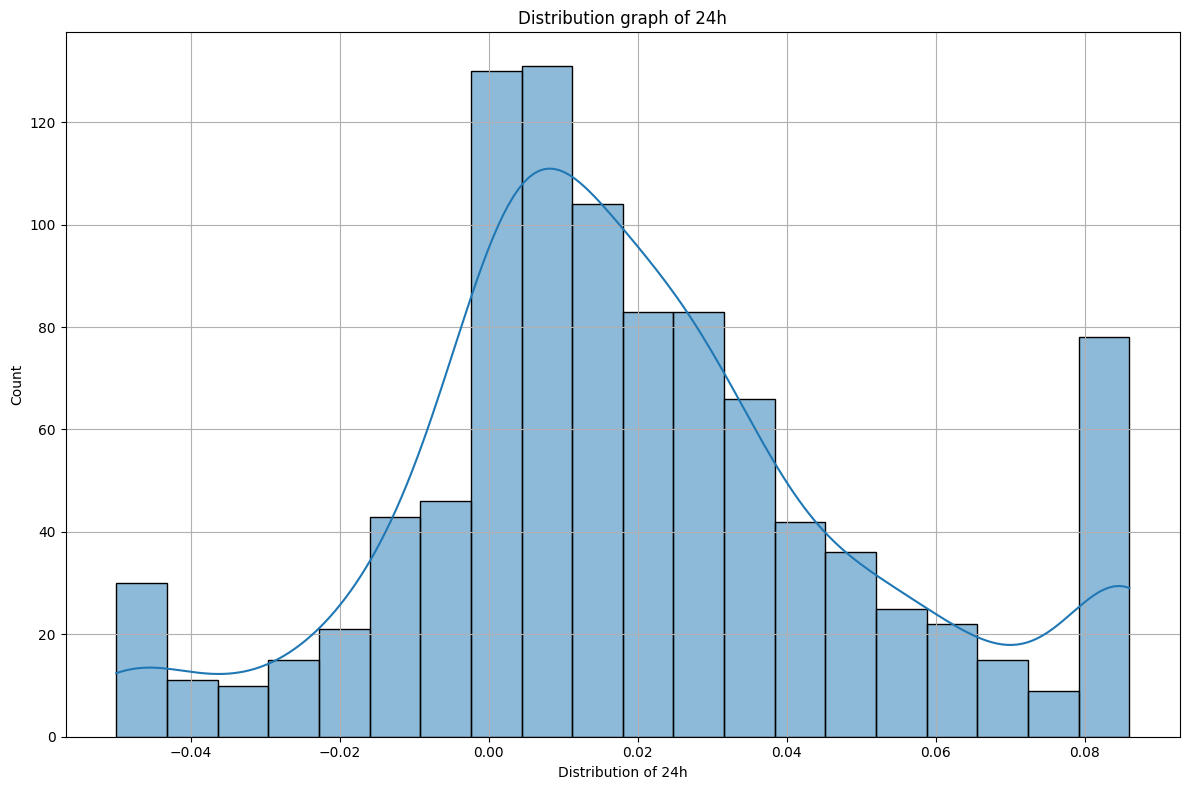

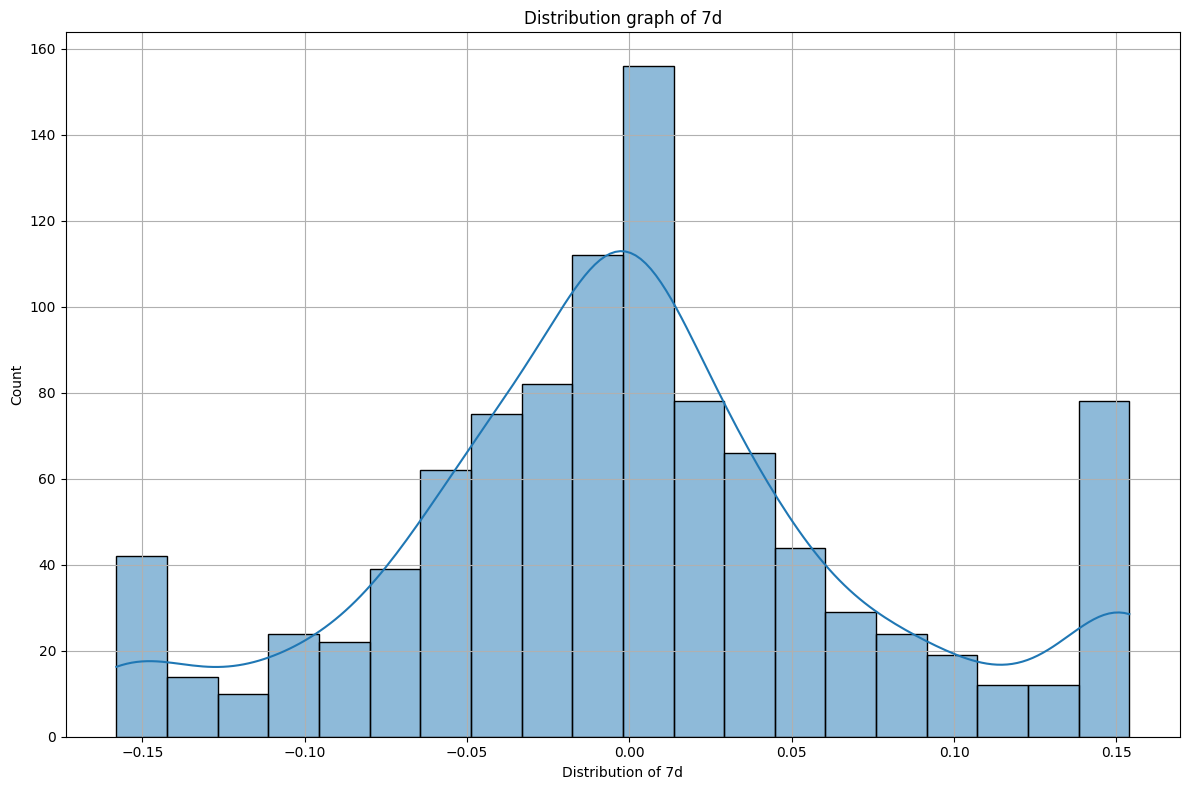

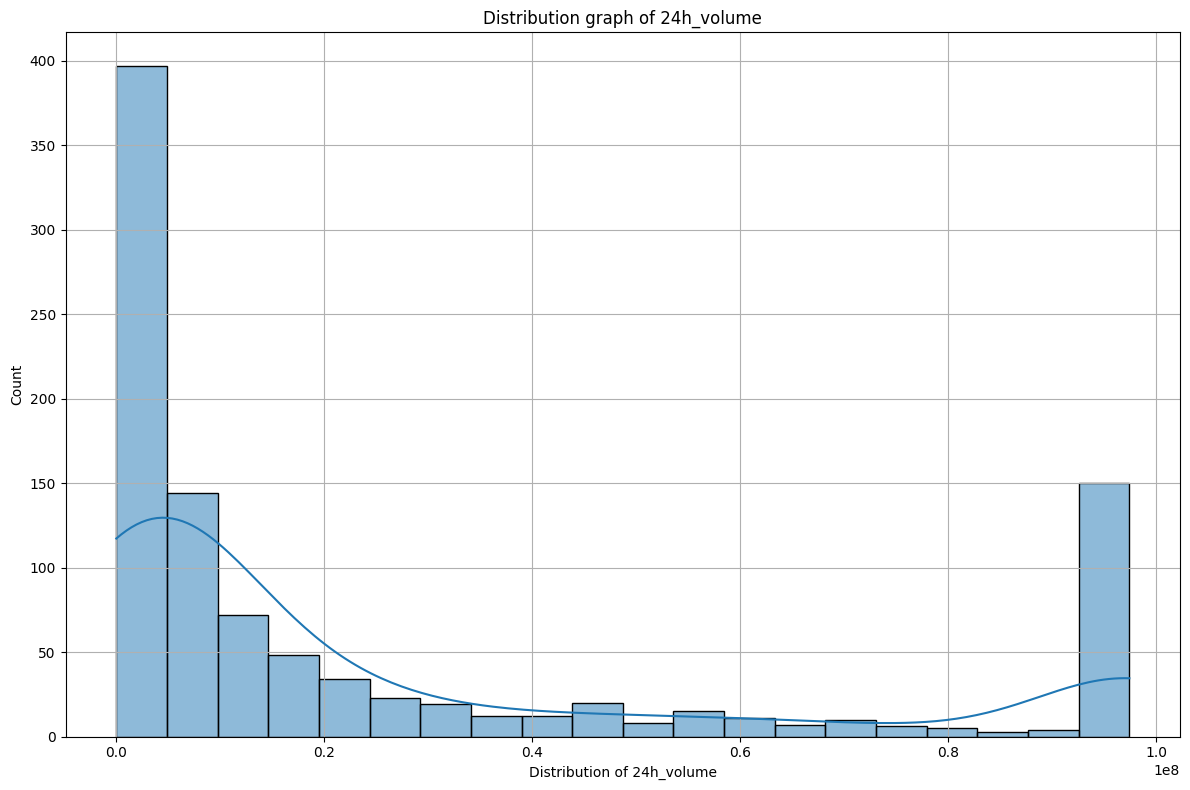

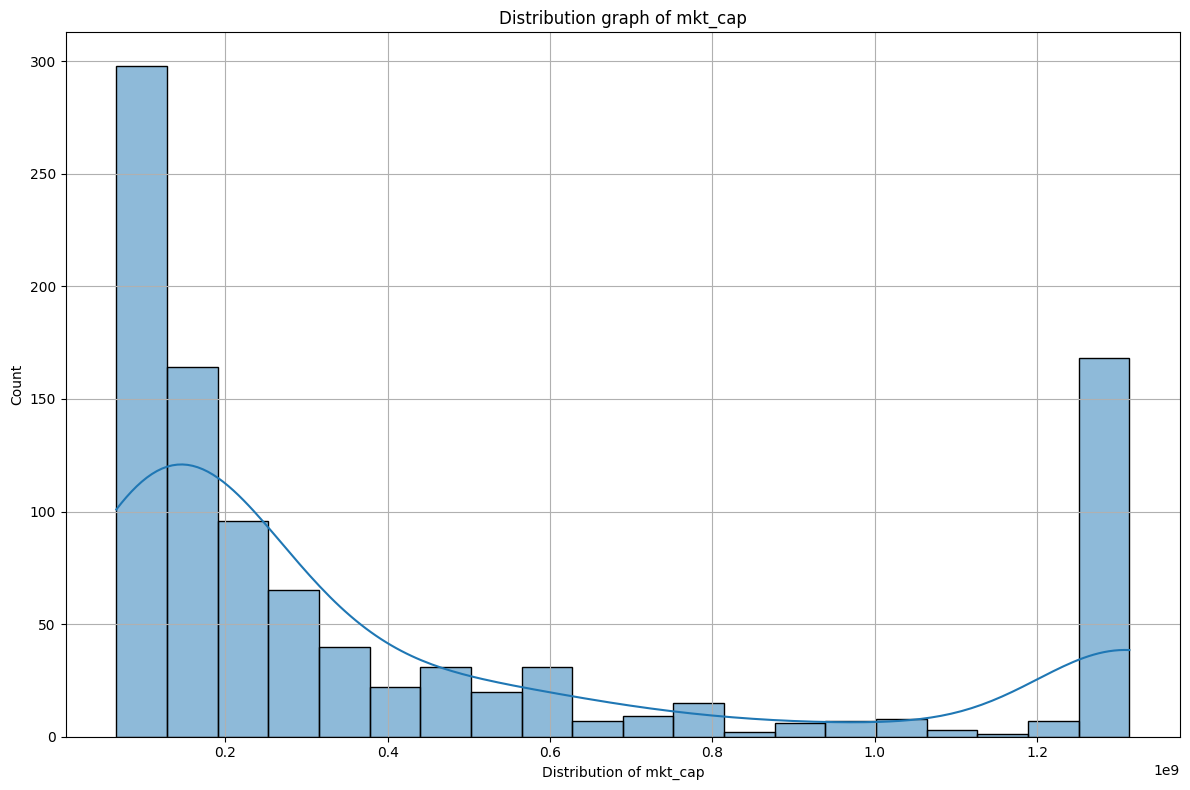

In [24]:
name = df.columns
for i in name[1:]:
    plt.figure(figsize=(12,8))
    sns.histplot(df[i],bins=20,kde=True)
    plt.grid(which='both')
    plt.xticks(minor=True)
    plt.xlabel(f'Distribution of {i}')
    plt.ylabel('Count')
    plt.title(f'Distribution graph of {i}')
    plt.tight_layout()
    plt.show()


Findings of Univariate Analysis:
Distribution graph of '1_h', '24_hr' and '7_days' is almost like bell shaped (normally distributed) rest other distributions graph i.e. 'mkt_cap', '24_hr_volume' is right skewed which indicates that it needs scaling before ingestion in Machine learning algorithm. 

In [25]:
dm = df.drop('coin', axis=1)

<Figure size 1200x800 with 0 Axes>

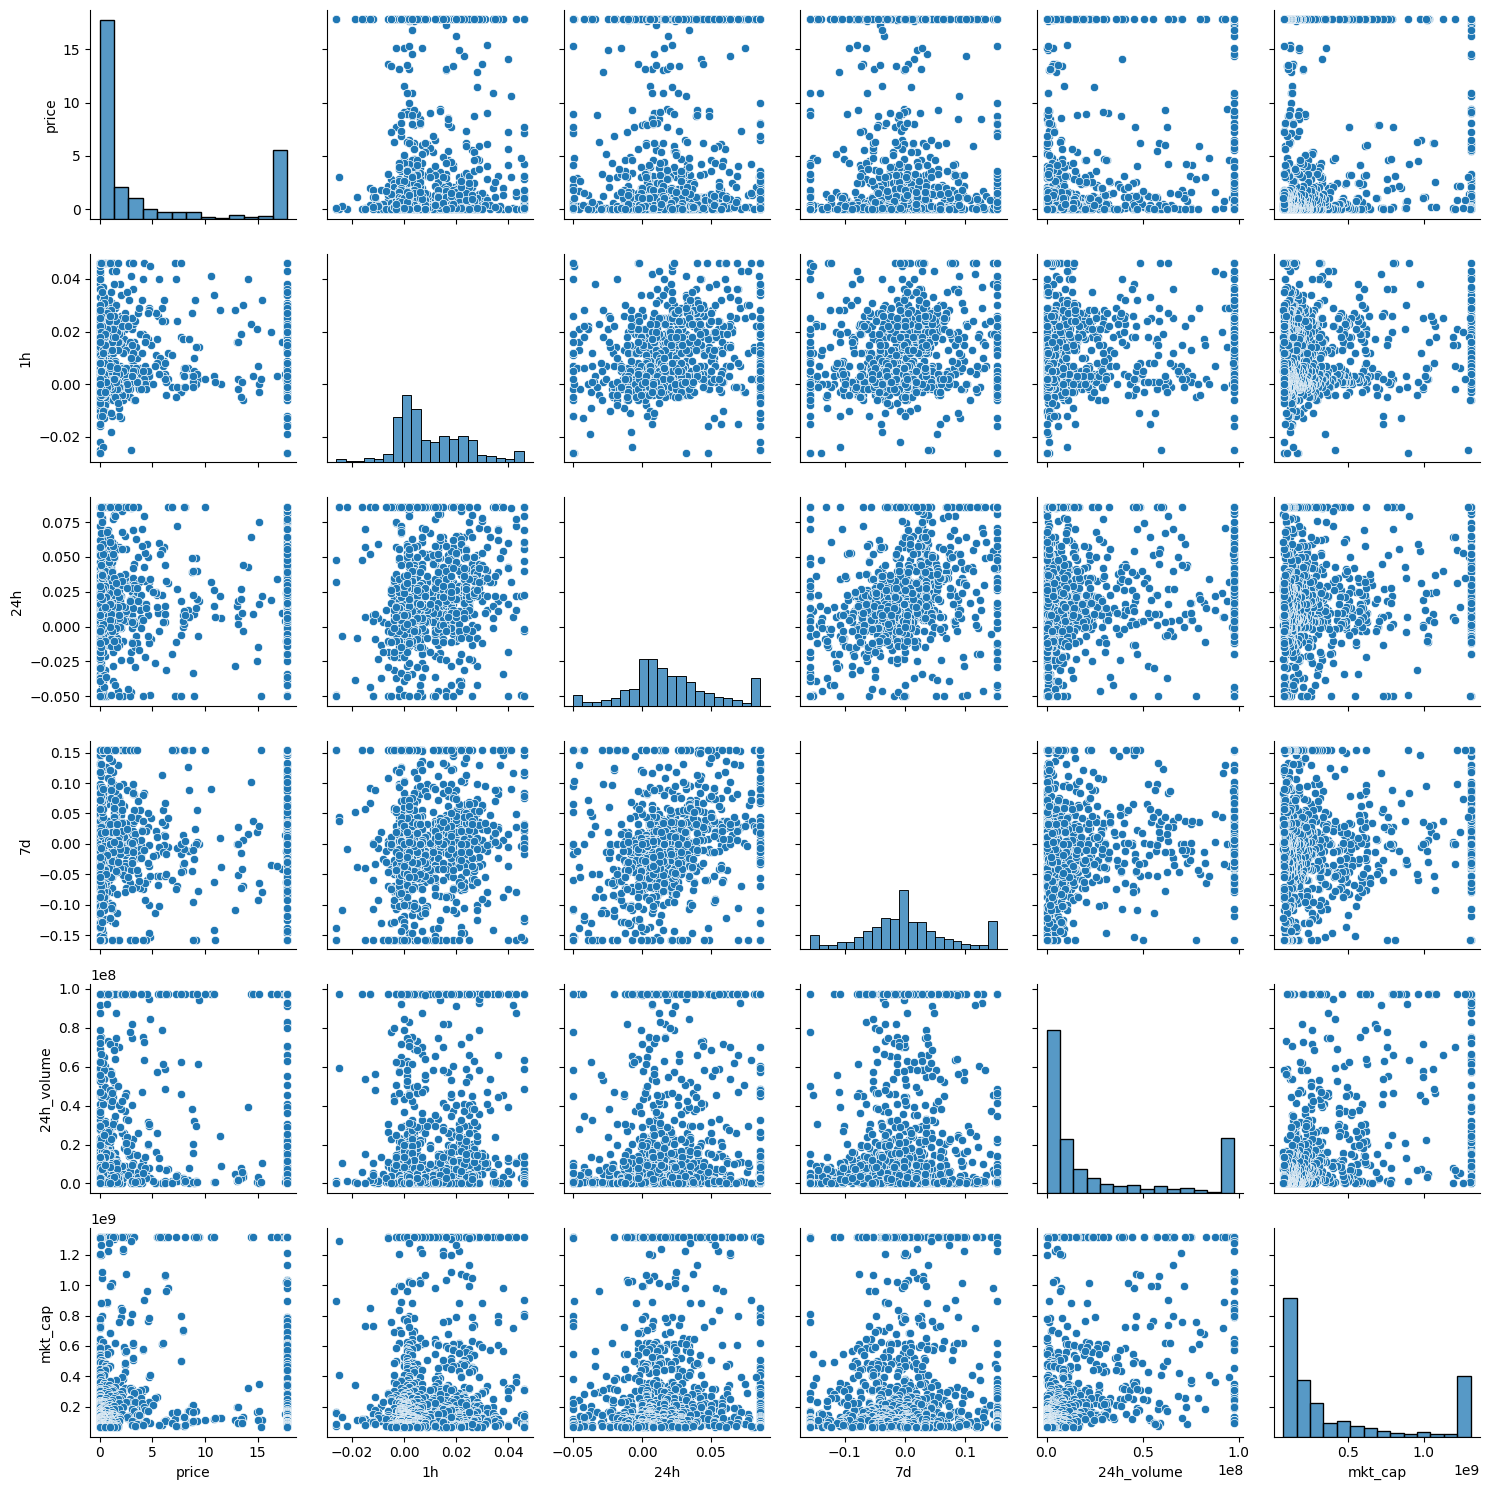

In [26]:
plt.figure(figsize=(12,8))
sns.pairplot(dm,kind='scatter')
plt.grid(which='both')
plt.xticks(minor=True)
plt.tight_layout()
plt.show()

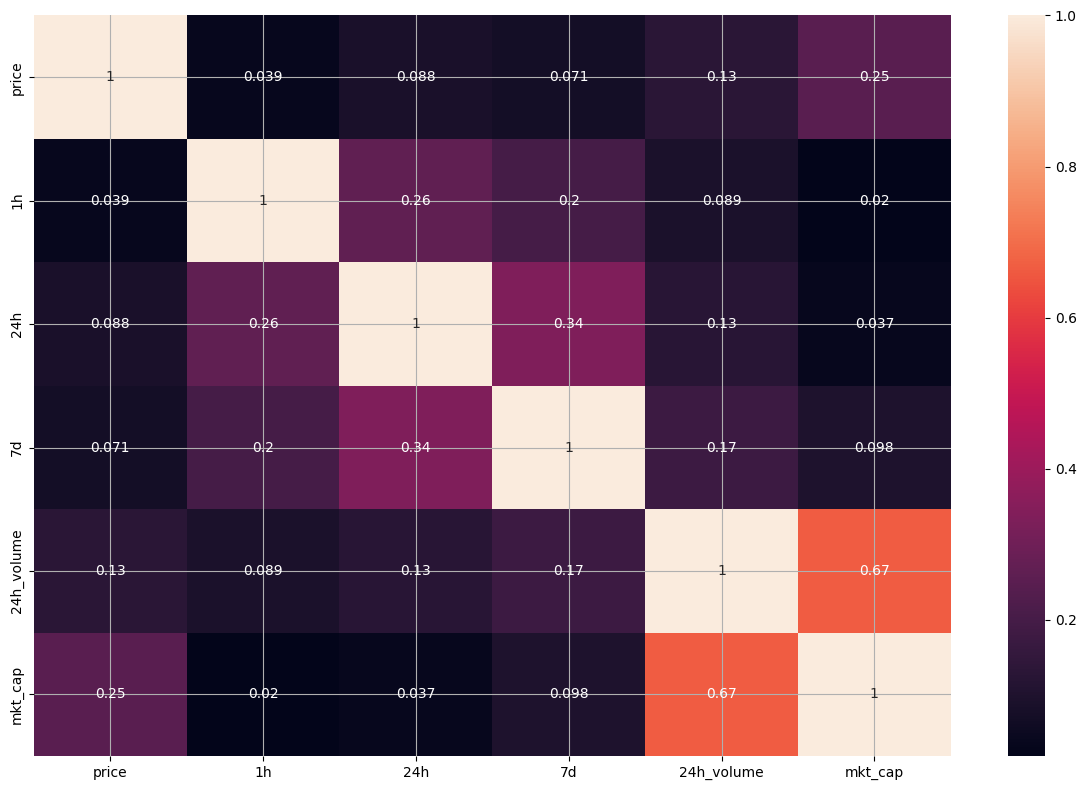

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(dm.corr(),annot=True)
plt.grid(which='both')
plt.xticks(minor=True)
plt.tight_layout()
plt.show()

as per heatmap and pair plot shows that features aren't linearly related except mkt_cap and 24h_volume. which means lenaer regression and SVM with linear kernel would not work well here, so we'll adopt tree algorithms, random forest regresser and XGboost regresser. 

Feature Engineering with data processing

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   price       1000 non-null   float64
 2   1h          1000 non-null   float64
 3   24h         1000 non-null   float64
 4   7d          1000 non-null   float64
 5   24h_volume  1000 non-null   float64
 6   mkt_cap     1000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
encod = LabelEncoder()

In [34]:
df['coin']=encod.fit_transform(df['coin'])

In [39]:
df['circulating_supply'] = df['mkt_cap']/df['price']

In [40]:
df['mkt_cap_ratio'] = df['24h_volume']/df['mkt_cap']

In [44]:
df['volatility_score'] = df[['1h', '24h', '7d']].std(axis=1, skipna=True)

In [ ]:
df['volatility_score']

0      0.017214
1      0.021378
2      0.000577
3      0.012055
4      0.000577
         ...   
995    0.055381
996    0.029143
997    0.024007
998    0.011533
999    0.101602
Name: volatility_score, Length: 1000, dtype: float64

In [46]:
df.drop(columns=['1h', '24h', '7d'],inplace=True)

In [47]:
df.head(5)

,coin,price,24h_volume,mkt_cap,circulating_supply,mkt_cap_ratio,volatility_score
0,67,17.790168,97440846.0,1.313443e+09,7.382969e+07,0.074187,0.017214
1,148,17.790168,97440846.0,1.313443e+09,7.382969e+07,0.074187,0.021378
2,417,1.000000,97440846.0,1.313443e+09,1.313443e+09,0.074187,0.000577
3,45,17.790168,97440846.0,1.313443e+09,7.382969e+07,0.074187,0.012055
4,439,0.999874,97440846.0,1.313443e+09,1.313608e+09,0.074187,0.000577


In [48]:
X= df.drop('volatility_score',axis=1)

In [49]:
Y = df['volatility_score']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler= StandardScaler()

In [54]:
X_train = scaler.fit_transform(X_train)

In [55]:
X_test=scaler.transform(X_test)

In [79]:
from sklearn.svm import SVR

In [80]:
SVM_model = SVR(kernel='rbf',C=0.8,verbose=3)

In [81]:
SVM_model.fit(X_train,Y_train)

[LibSVM]

SVR(C=0.8, verbose=3)

In [82]:
Y_pred = SVM_model.predict(X_test)

In [83]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [84]:
print(f'root mean sqaured error is {root_mean_squared_error(Y_test,Y_pred)}')
print(f'mean absolute error is {mean_absolute_error(Y_test,Y_pred)}')
print(f'r2_score is {r2_score(Y_test,Y_pred)}')

root mean sqaured error is 0.037716168529918256
mean absolute error is 0.03272997470382958
r2_score is -1.0449556815668242


In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
DT_model = DecisionTreeRegressor()

In [64]:
DT_model.fit(X_train,Y_train)

DecisionTreeRegressor()

In [65]:
Y_pred = DT_model.predict(X_test)
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
print(f'root mean sqaured error is {root_mean_squared_error(Y_test,Y_pred)}')
print(f'mean absolute error is {mean_absolute_error(Y_test,Y_pred)}')
print(f'r2_score is {r2_score(Y_test,Y_pred)}')

root mean sqaured error is 0.032954548746731774
mean absolute error is 0.02322629022468752
r2_score is -0.5612034536142612


In [66]:
from sklearn.ensemble import RandomForestRegressor

In [67]:
RF_model = RandomForestRegressor()

In [68]:
RF_model.fit(X_train,Y_train)

RandomForestRegressor()

In [69]:
Y_pred = RF_model.predict(X_test)
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
print(f'root mean sqaured error is {root_mean_squared_error(Y_test,Y_pred)}')
print(f'mean absolute error is {mean_absolute_error(Y_test,Y_pred)}')
print(f'r2_score is {r2_score(Y_test,Y_pred)}')

root mean sqaured error is 0.023496793915112994
mean absolute error is 0.01836597339143977
r2_score is 0.20631900574135253


In [75]:
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
AR_model = GradientBoostingRegressor()

In [77]:
AR_model.fit(X_train,Y_train)

GradientBoostingRegressor()

In [78]:
Y_pred = AR_model.predict(X_test)
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
print(f'root mean sqaured error is {root_mean_squared_error(Y_test,Y_pred)}')
print(f'mean absolute error is {mean_absolute_error(Y_test,Y_pred)}')
print(f'r2_score is {r2_score(Y_test,Y_pred)}')

root mean sqaured error is 0.02496270675455488
mean absolute error is 0.019592015261919074
r2_score is 0.10419782005231115
